# 1. Plot from resized dataset

In [79]:
# data path
dataset_path = '/home/yifan/Github/segmentation_train/dataset/cityscapes_all/'
mask_path = dataset_path + 'gtFine_256/'
mask_test_path = mask_path + 'test'

In [80]:
import os
import numpy as np
import imageio
import re
import matplotlib.pyplot as plt
masks = os.listdir(mask_test_path)
masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [81]:
print(masks[0], masks[1], masks[2], masks[3])


aachen_000000_000019_gtFine_trainIds.npy aachen_000001_000019_gtFine_trainIds.npy aachen_000002_000019_gtFine_trainIds.npy aachen_000003_000019_gtFine_trainIds.npy


## Run it

aachen_000016_000019_gtFine_trainIds.npy
(256, 256)
[ 0  1  2  5  6  7  8 10 11 12 13 15 17 18 19]


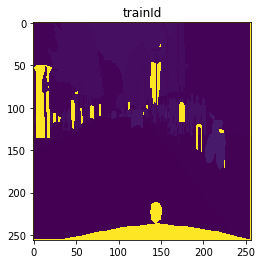

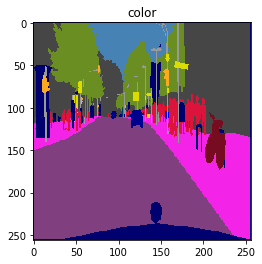

In [82]:
from dataGenerator import palette
def plot(i):
    print(masks[i])
    # img = plt.imread(os.path.join(mask_test_path, masks[i]))
    img = np.load(os.path.join(mask_test_path, masks[i]))
    print(img.shape)
    print(np.unique(img))
#     trainId = np.argmax(img,axis=-1)
    trainId = img.astype(int)
    trainId = np.where(trainId==19, 255, trainId)
    color = palette(trainId).astype(int)

    fig = plt.figure()
    a = plt.figure(1)
    plt.title('trainId')
    plot1 = plt.imshow(trainId)
    b = plt.figure(2)
    plt.title('color')
    plot2 = plt.imshow(color)
plot(16)

In [ ]:
2. Plot 

# plot results

In [63]:
import numpy as np
import os
import re
import imageio
import matplotlib.pyplot as plt 
# data path
ckpt_name = 'cityscapes_unet_softmax_SGDRlr_100e/'
weights = 'weights.04-11.59-0.38-iou39.82-results'
# weights = None

if(weights==None):
    result_path = '/media/exfat/yifan/rf_results/' + ckpt_name
else:
    result_path = '/media/exfat/yifan/rf_results/' + ckpt_name + weights
masks = os.listdir(result_path)
masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])
print(masks[0:10]) # 5*i + ?

['aachen_000000_000019_A.jpg', 'aachen_000000_000019_B_color_gt.jpg', 'aachen_000000_000019_B_color_pred.jpg', 'aachen_000000_000019_B_trainId_gt.npy', 'aachen_000000_000019_B_trainId_pred.npy', 'aachen_000001_000019_A.jpg', 'aachen_000001_000019_B_color_gt.jpg', 'aachen_000001_000019_B_color_pred.jpg', 'aachen_000001_000019_B_trainId_gt.npy', 'aachen_000001_000019_B_trainId_pred.npy']


In [64]:
from PIL import Image
def plot_result(i):
    print(masks[5*i+3],masks[5*i+4])
    color_gt = np.array(Image.open(os.path.join(result_path, masks[5*i+1])))
    print(color_gt.shape)
    color_pred = np.array(Image.open(os.path.join(result_path, masks[5*i+2])))
    
    fig = plt.figure()
    a = plt.figure(1)
    plt.title('color_gt')
    plot1 = plt.imshow(color_gt)
    b = plt.figure(2)
    plt.title('color_pred')
    plot2 = plt.imshow(color_pred)


In [65]:
from PIL import Image
def plot_result_train(i):
    print(masks[5*i+3],masks[5*i+4])
    color_gt = np.load(os.path.join(result_path, masks[5*i+3]))
    print(color_gt.shape)
    color_pred = np.load(os.path.join(result_path, masks[5*i+4]))
    print(np.unique(color_gt))
    print(np.unique(color_pred))
    fig = plt.figure()
    a = plt.figure(1)
    plt.title('color_gt')
    plot1 = plt.imshow(color_gt)
    b = plt.figure(2)
    plt.title('color_pred')
    plot2 = plt.imshow(color_pred)


aachen_000033_000019_B_trainId_gt.npy aachen_000033_000019_B_trainId_pred.npy
(256, 256, 3)


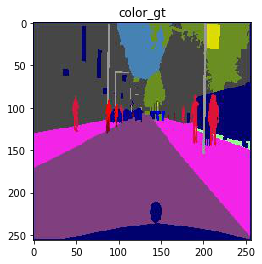

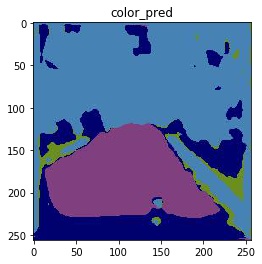

In [71]:
plot_result(33)

aachen_000100_000019_B_trainId_gt.npy aachen_000100_000019_B_trainId_pred.npy
(256, 256)
[  0   1   2   5   7   8  11  13 255]
[  0   8  10 255]


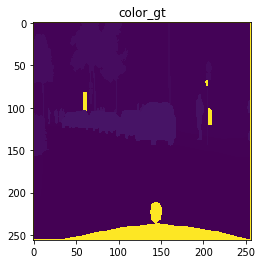

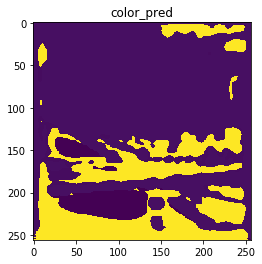

In [69]:
plot_result_train(100)